<a href="https://colab.research.google.com/github/Ruchir555/AER201/blob/master/T_parameter_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program finds the $t$-parameters between an arbitrary numerical sequence of vectors following the majorization condition. This is done in the function t_parameters(x, y). Firstly, it sorts the vectors $x$ & $y$ into descending order, after which it checks whether or not the vectors actually obey the majorization relation ($x \prec y$), and if they are the same length. Then, it finds the k index such that $y_k \leq x_1 \leq y_{k-1}$, such that we can write the respective t-parameter as:

$$
t = \frac{x_1-y_k}{y_1-y_k}
$$

This process is repeated with all the reduced vectors (obtained by removing the first element of the vector and transforming the $k$-th element of y as $(t\cdot y_k + (1-t)\cdot y_1)$), such that ($d-1$) $t$-parameters are found for vectors of length $d$. 

This program has several helper functions (sum_arr_till_index(arr, idx), isMajorized(x,y), bubbleSort(arr), find_k_idx(x,y)) which are fairly straightforward, but explained below nevertheless. 

In [4]:
def bubbleSort(arr):  #Sort in descending order, O(n^2)
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] < arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#Test code:
x = [5, 3, 2, 9, 10, 19, 110]
print(bubbleSort(x))

[110, 19, 10, 9, 5, 3, 2]


In [5]:
def sum_arr_till_index(arr, idx): #sum an array from index 0 to idx
  sum = 0
  for i in range(0,idx):
    sum += arr[i]
  return sum


def isMajorized(x,y): #check if x is majorized by y
  if (len(x)!= len(y)):
    return False

  isTrue = 1  #1 == True, 0 == False
  x = bubbleSort(x)
  y = bubbleSort(y)

  for k in range(0,len(x)+1):
    if (sum_arr_till_index(x,k) <= sum_arr_till_index(y,k)):  #Majorization def'n
      isTrue*=1
    else:
      isTrue *= 0
  return isTrue==1  #returns 0 if false (does not y majorize x), 1 if true (y majorizes x)


# Test Code:
A = [2, 3, 5, 3, 2]
B = [3, 1, 6, 2, 3]
print(isMajorized(A,B))
# isMajorized(B,A)
sum_arr_till_index(A,len(A))

True


15

In [8]:
def find_k_idx(x,y): #Find the k-index such that y_k <= x_1 <= y_{k-1}.
  x = bubbleSort(x)
  y = bubbleSort(y)

  x1 = x[0]

  for k in range(1, len(y)):
    if (y[k] <= x1 <= y[k-1]):
      return k

# Test Code:
xx = [100, 50, 25, 25, 0]
yy = [125, 25, 25, 25, 0]
# find_k_idx(xx,yy)
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
# find_k_idx(X,Y)
X, Y = bubbleSort(X[1:]), bubbleSort(Y[1:])
print(find_k_idx(X,Y))
yY = [15,10,5]
xX = [8,7,1]
print(find_k_idx(xX[1:], yY[1:]))

1
1


In [20]:
def t_parameters(x, y): # x majorized by y; finds t-parameters such that x = Dy, D = T_r...T_2 T_1
  # First sort vectors into descending order
  x_copy =  bubbleSort(x) 
  y_copy = bubbleSort(y)
  t_parameters_list = []
  index_choice_list = []  #which index is chosen at each reduced vector step

  if (len(x)!= len(y)):
    print("Unequal lengths \n")
    return False  #or break?
  if (isMajorized(x,y)==False):
    print("Not majorized \n")
    return t_parameters_list, index_choice_list  #or break?

  # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
  # Therefore x_1 = t*y_1 + (1-t)*y_k
  # Therefore t = (x_1-y_k)/(y_1-y_k)
  i=0
  k=0
  t=0
  while i < len(x)-1: #iterate appropriate amount of times (1 less than dimension of x,y)
    k = find_k_idx(x_copy, y_copy)  #Find appropriate k index
    index_choice_list.append(k+1) #append index choice; k+1 because Python starts from 0
    t = (x_copy[0]-y_copy[k])/(y_copy[0]-y_copy[k]) #Write down t
    t_parameters_list.append(t)  #Append t to list
    y_copy[k] = t*y_copy[k] + (1-t)*y_copy[0] #Change k-th index entry according to T-transform
    y_copy = y_copy[1:] # Pop the first index to get reduced vector
    x_copy = x_copy[1:] # Pop the first index to get reduced vector
    i+=1

    if (t>1 or t<0):  #out of bounds t condition
      print("Incorrect t obtained \n")
      return False  #or break?

  return t_parameters_list, index_choice_list


# Test Code:
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
tparams1, indices1 = t_parameters(X,Y)
print('Example 1:', tparams1, '\n')  #[0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Xx = [1/2, 2/5, 1/10]
Yy = [3/5, 1/5, 1/5]
tparams2, indices2 = t_parameters(Xx,Yy)
print('Example 2:', tparams2, '\n')  #Nielsen example, not majorized

a = [5, 3, 2]
b = [6, 3, 1]
tparams3, indices3 = t_parameters(a,b)
print('Example 3:', tparams3, '\n')  #[0.6666666666666666, 0.6666666666666666] 

# 5D pseudo-TMS->Bell state case:
lamb = .75  #lambda = tanh(r), in this case lamb>=0.72 for majorization condition
N = 1 + lamb**2 + lamb**4 + lamb**6 + lamb**8 #normalization
pseudoTMS5D = [1/N, lamb**2/N, lamb**4/N, lamb**6/N, lamb**8/N]
Bell = [1/2, 1/2, 0, 0, 0]
tparams4, indices4 = t_parameters(pseudoTMS5D,Bell)
print('pseudoTMS5D->Bell:', tparams4, '\n') #[0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 
print('pseudoTMS5D->Bell: Index choice:',indices4)

Example 1: [0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Not majorized 

Example 2: [] 

Example 3: [0.6666666666666666, 0.6666666666666666] 

pseudoTMS5D->Bell: [0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 

pseudoTMS5D->Bell: Index choice: [3, 2, 2, 2]


In [21]:
from math import tanh, atanh, sqrt

def generateTMSSvector(r, N): #generates an N-length TMSS vector (renormalized) with squeezing parameter r
  lamb = tanh(r)
  r_min = atanh(1/sqrt(2))
  if r < r_min:
    print("Less than minimum r by Nielsen criteria \n")
    return False

  TMSSvector = [0]*N  #instantiate

  for i in range (0, N):
    TMSSvector[i] = (1-lamb**2)*(lamb)**(2*i) #generate

  reduced_vector_sum = sum_arr_till_index(TMSSvector, N)

  for j in range (0, N):  #renormalize
    TMSSvector[j] = TMSSvector[j]/reduced_vector_sum

  return TMSSvector


def generateBellstate_reduced(N): #generates an N-length Bell-state vector 
  bellStatearray = [0]*N
  bellStatearray[0] = 1/2
  bellStatearray[1] = 1/2

  return bellStatearray

# Test Code:
print('Example 1:', generateTMSSvector(.5, 10))
print('Example 2:', generateTMSSvector(1, 10))
print('Example 3:', generateTMSSvector(atanh(.75), 5))
print('Example 4:', generateBellstate_reduced(5))

Less than minimum r by Nielsen criteria 

Example 1: False
Example 2: [0.42179224436615365, 0.24465032424057584, 0.141903465391982, 0.08230765094123561, 0.04774054942739311, 0.027690743613331813, 0.016061341795519987, 0.00931599034950864, 0.005403513435991128, 0.0031341764383082103]
Example 3: [0.4636073598800235, 0.2607791399325132, 0.14668826621203868, 0.08251214974427176, 0.04641308423115286]
Example 4: [0.5, 0.5, 0, 0, 0]


In [3]:
# Check the index distribution of the TMSS --> Bell state conversion for several lambda

import numpy as np

lamb_min = 1/(np.sqrt(2)) #minimum lambda by Nielsen criteria, lambda = tanh(r)
lambVector = np.linspace(lamb_min, 100, 100)  #create many lambda to test the index distribution 



0.7071067811865475


pseudoTMSND->Bell: [0.04017822625156039, 0.040170930559424035, 0.041844571570927615, 0.0418372913050433, 0.04365614926820433, 0.04364822216930851, 0.045632054434082886, 0.045624146460506367, 0.04779653813684354, 0.04778785908713025, 0.05017703467577322, 0.05016838063319691, 0.052808592280100104, 0.05279900330914578, 0.05573201050248009, 0.05572245441510328, 0.058999958658643464, 0.05898924525552492, 0.06267572766880405, 0.0626650602490949, 0.06684236166987463, 0.06683022451264767, 0.0716033577380492, 0.07159128659645156, 0.07709781886569954, 0.07708381919493572, 0.083506848908819, 0.08349295196561707, 0.09108254074348174, 0.09106600222838317, 0.1001717026678398, 0.10015533494202732, 0.11128270500582556, 0.11126249793270247, 0.1251688988819349, 0.12514901580070614, 0.14302583173255395, 0.14299986198952735, 0.16683065646229292, 0.16680541595616405, 0.2001634793164011, 0.20012713298703055, 0.2501532449810913, 0.25011918679332196, 0.33348468108533236, 0.33342413319133674, 0.500113498791949

[]

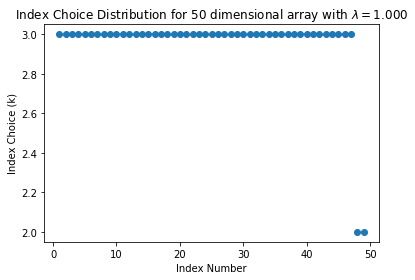

In [137]:
import matplotlib.pyplot as plt

r = 5 #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
N = 50 #dimension
# check_idx_list = [2]*(N-1)
# check_idx_list[0] = 3
pseudoTMSND = generateTMSSvector(r, N)
BellN = generateBellstate_reduced(N)
tparamsN, indicesN = t_parameters(pseudoTMSND,BellN)
print('pseudoTMSND->Bell:', tparamsN, '\n') 
print('pseudoTMSND->Bell: Index choice:',indicesN)
# print('Index list match?',indicesN==check_idx_list) #check if it matches the [3,2,2,2,...] pattern


# Plot
idx_array = [i for i in range(1,len(indicesN)+1)] #generate an indices number array (index 1, index 2, ..., index N)
plt.scatter(idx_array, indicesN)
plt.title('Index Choice Distribution for '+ str(N)+ r' dimensional array with $\lambda = $'+ str(format(tanh(r),'0.3f')))
plt.xlabel('Index Number')
plt.ylabel('Index Choice (k)')
plt.plot()
